In [52]:
# Import Libraries
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

In [53]:
df = pd.read_csv("DC_Properties.csv", encoding = "ISO-8859-1") #1st column needs encoding to read pound/hashtag(#) symbol
df.head()

/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (18,19,20,21,22,23,24,33,34,35,37,43,45) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Unnamed: 0,BATHRM,HF_BATHRM,HEAT,AC,NUM_UNITS,ROOMS,BEDRM,AYB,YR_RMDL,...,LONGITUDE,ASSESSMENT_NBHD,ASSESSMENT_SUBNBHD,CENSUS_TRACT,CENSUS_BLOCK,WARD,SQUARE,X,Y,QUADRANT
0,0,4,0,Warm Cool,Y,2.0,8,4,1910.0,1988.0,...,-77.040832,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
1,1,3,1,Warm Cool,Y,2.0,11,5,1898.0,2007.0,...,-77.040764,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
2,2,3,1,Hot Water Rad,Y,2.0,9,5,1910.0,2009.0,...,-77.040678,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
3,3,3,1,Hot Water Rad,Y,2.0,8,5,1900.0,2003.0,...,-77.040629,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
4,4,2,1,Warm Cool,Y,1.0,11,3,1913.0,2012.0,...,-77.039361,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW


In [54]:
# Take a look at the type of data that's available. 
df.columns

Index(['Unnamed: 0', 'BATHRM', 'HF_BATHRM', 'HEAT', 'AC', 'NUM_UNITS', 'ROOMS',
       'BEDRM', 'AYB', 'YR_RMDL', 'EYB', 'STORIES', 'SALEDATE', 'PRICE',
       'QUALIFIED', 'SALE_NUM', 'GBA', 'BLDG_NUM', 'STYLE', 'STRUCT', 'GRADE',
       'CNDTN', 'EXTWALL', 'ROOF', 'INTWALL', 'KITCHENS', 'FIREPLACES',
       'USECODE', 'LANDAREA', 'GIS_LAST_MOD_DTTM', 'SOURCE', 'CMPLX_NUM',
       'LIVING_GBA', 'FULLADDRESS', 'CITY', 'STATE', 'ZIPCODE', 'NATIONALGRID',
       'LATITUDE', 'LONGITUDE', 'ASSESSMENT_NBHD', 'ASSESSMENT_SUBNBHD',
       'CENSUS_TRACT', 'CENSUS_BLOCK', 'WARD', 'SQUARE', 'X', 'Y', 'QUADRANT'],
      dtype='object')

In [55]:
#Price is key but what else.  Given that all good programmers are plagerists 
#I wanted to show the map but my a relevant area.  Here we get unique values of zip, ward, etc.
df.ZIPCODE.nunique(),df.CENSUS_BLOCK.nunique(),df.CENSUS_TRACT.nunique(),df.WARD.nunique()

(24, 3848, 176, 8)

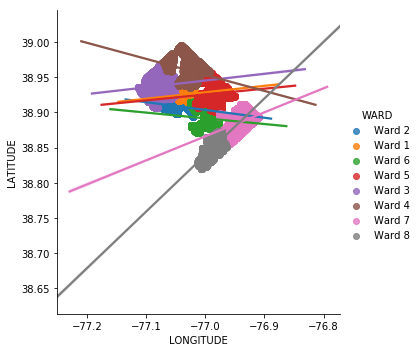

In [56]:
# Ward seems interesting since politicians are elected by it.  
sns.lmplot(y='LATITUDE', x='LONGITUDE', hue='WARD', data=df)

In [57]:
# Ward not sorting automatically bugged me.  
df = df.sort_values(by=['WARD'])

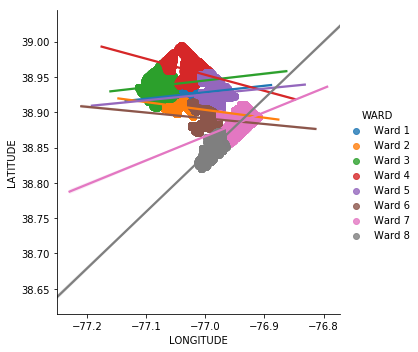

In [58]:
# better, but still the plot lines aren't necessary for this visual 
sns.lmplot(y='LATITUDE', x='LONGITUDE', hue='WARD', data=df)

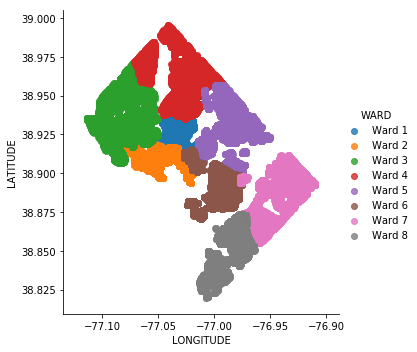

In [59]:
# Much better map of DC to show districs:-)
sns.lmplot(y='LATITUDE', x='LONGITUDE', hue='WARD', fit_reg=False,data=df)

In [60]:
# Seems like we need to try to unbias the data some... 
# Here I'm selecting out data by wards that have the most values in bedrooms and bath rooms 
# with a value for price.  My plan is to drop any missing values.  
# Doing some cleanup too

df[df.duplicated(keep='first')] # No Dupes but maybe there are with the columns I am interested in 



,Unnamed: 0,BATHRM,HF_BATHRM,HEAT,AC,NUM_UNITS,ROOMS,BEDRM,AYB,YR_RMDL,...,LONGITUDE,ASSESSMENT_NBHD,ASSESSMENT_SUBNBHD,CENSUS_TRACT,CENSUS_BLOCK,WARD,SQUARE,X,Y,QUADRANT


In [61]:
df.iloc[0] # Figuring out fields. Too lazy to read documentation 

Unnamed: 0                            140444
BATHRM                                     2
HF_BATHRM                                  0
HEAT                              Forced Air
AC                                         Y
NUM_UNITS                                NaN
ROOMS                                      4
BEDRM                                      2
AYB                                     2006
YR_RMDL                                  NaN
EYB                                     2006
STORIES                                  NaN
SALEDATE                 2017-08-30 00:00:00
PRICE                                 745000
QUALIFIED                                  U
SALE_NUM                                   2
GBA                                      NaN
BLDG_NUM                                   1
STYLE                                    NaN
STRUCT                                   NaN
GRADE                                    NaN
CNDTN                                    NaN
EXTWALL   

In [62]:
df = df[['BEDRM', 'BATHRM', 'PRICE', 'LANDAREA','SOURCE','FULLADDRESS','LATITUDE','WARD','LONGITUDE']].copy(deep=True) #deep is default but for clarity... 

In [63]:
df.SOURCE.nunique()

2

In [64]:
# OK, looks like by type of residence is important.  Address is often null so not using it. 
df = df.drop('FULLADDRESS', 1)

In [65]:
df = df.dropna()

In [66]:
df.count()

BEDRM        98216
BATHRM       98216
PRICE        98216
LANDAREA     98216
SOURCE       98216
LATITUDE     98216
WARD         98216
LONGITUDE    98216
dtype: int64

In [67]:
df = df.drop_duplicates()

In [68]:
df.count()

BEDRM        95688
BATHRM       95688
PRICE        95688
LANDAREA     95688
SOURCE       95688
LATITUDE     95688
WARD         95688
LONGITUDE    95688
dtype: int64

In [69]:
columnslist = {'BEDRM','BATHRM','PRICE'}
for column in columnslist: 
        print (column)
        print (df.count())
        mean = np.mean(df[column], axis=0)
        sd = np.std(df[column], axis=0)
        df = df[df.loc[:,column] > mean - (2*sd)]
        df = df[df.loc[:,column] < mean + (2*sd)]
        # not really tested but looks right 







#final_list = [x for x in arr if (x > mean - 2 * sd)]
#final_list = [x for x in final_list if (x < mean + 2 * sd)]

BEDRM
BEDRM        95688
BATHRM       95688
PRICE        95688
LANDAREA     95688
SOURCE       95688
LATITUDE     95688
WARD         95688
LONGITUDE    95688
dtype: int64
BATHRM
BEDRM        92796
BATHRM       92796
PRICE        92796
LANDAREA     92796
SOURCE       92796
LATITUDE     92796
WARD         92796
LONGITUDE    92796
dtype: int64
PRICE
BEDRM        88241
BATHRM       88241
PRICE        88241
LANDAREA     88241
SOURCE       88241
LATITUDE     88241
WARD         88241
LONGITUDE    88241
dtype: int64


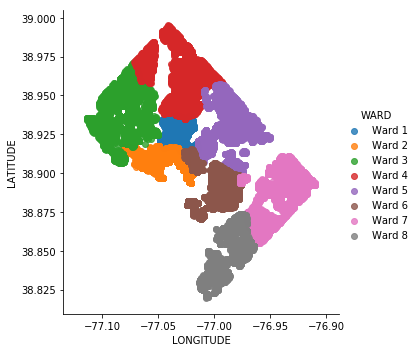

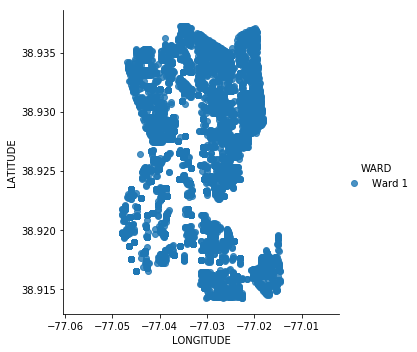

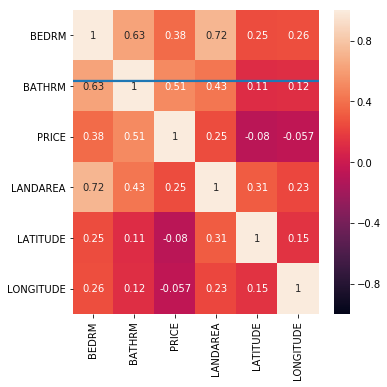

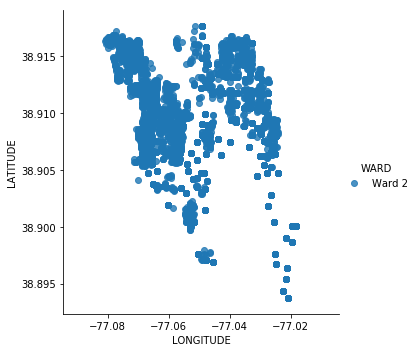

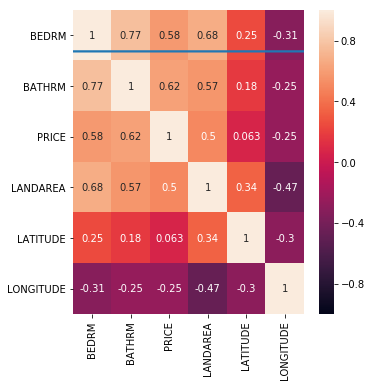

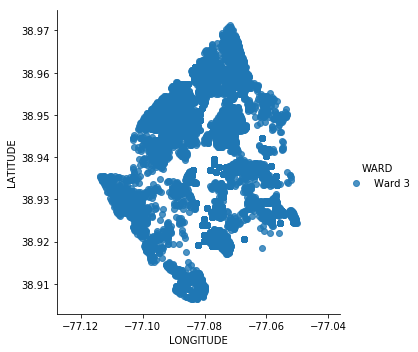

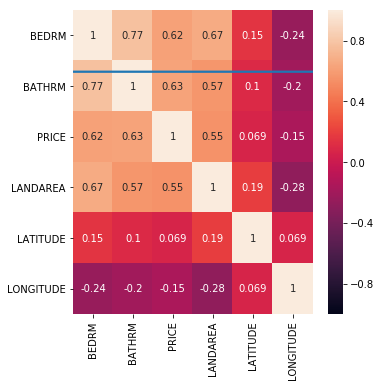

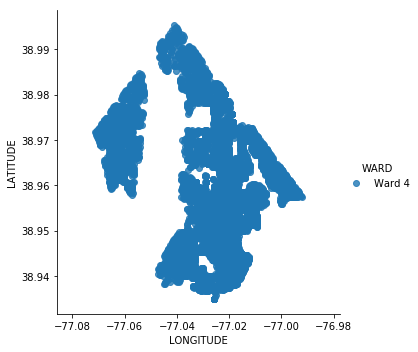

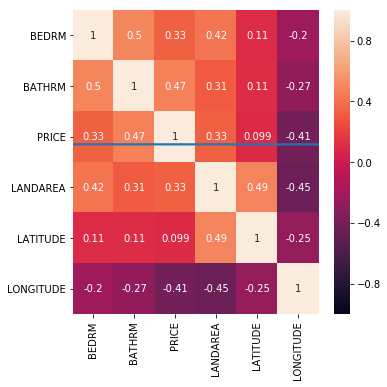

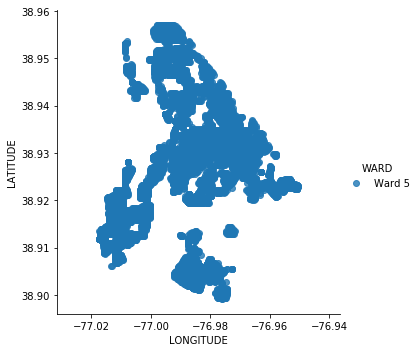

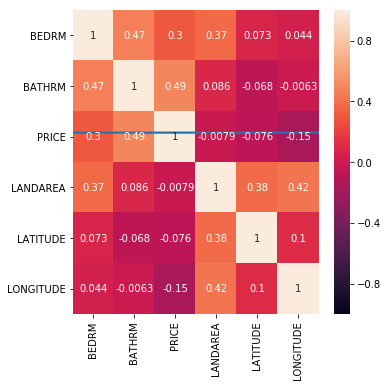

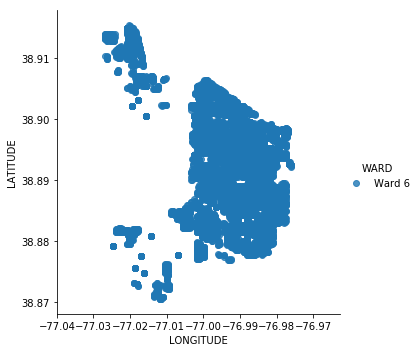

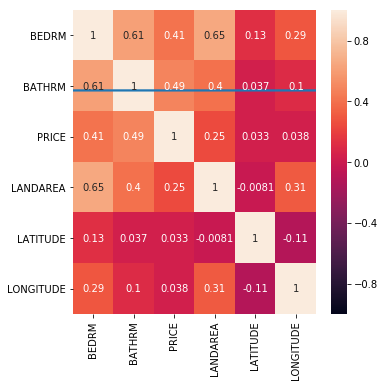

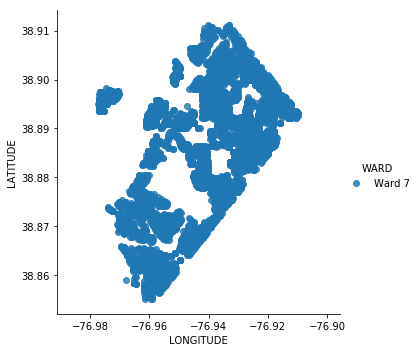

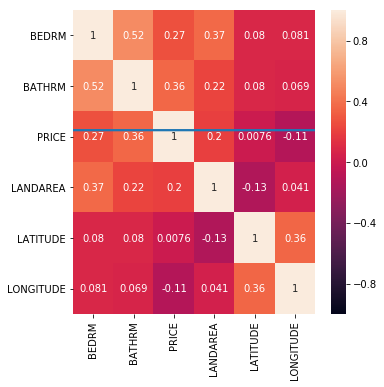

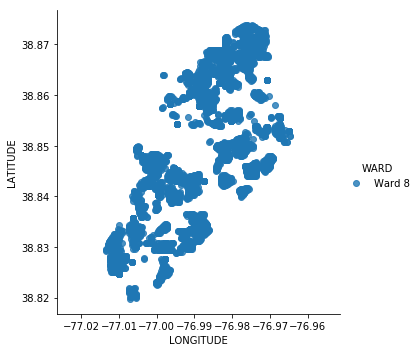

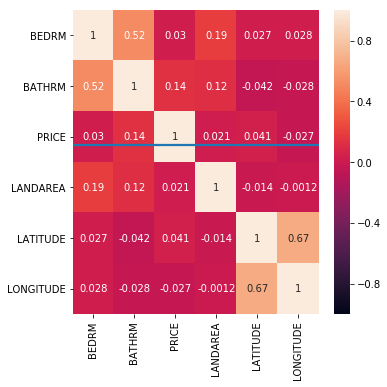

In [77]:


sns.lmplot(y='LATITUDE', x='LONGITUDE', hue='WARD', fit_reg=False,data=df)
wards = df.WARD.unique() 
for ward in wards: 
    df_ward = df[df.loc[:,'WARD'] == ward ]
    sns.lmplot(y='LATITUDE', x='LONGITUDE', hue='WARD', fit_reg=False,data=df_ward)  
    sns.lmplot(x='PRICE', y='BEDRM', data=df_ward,  fit_reg=True   )   #color by evolution stage
    corr = df_ward.corr()
    sns.heatmap(corr, vmin=-1, annot=True)